https://github.com/Michael50505/toy_ds_project

In [1]:

library(tidyverse)
library(tidymodels)
library(lubridate)
library(GGally)
library(ISLR)
library(tidyclust)
library(forcats)
library(repr)
library(ggplot2)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The love of videogames many players have extends beyond the scope of game play itself. Among the most significant areas of such passion is through the purchase of newsletters. These newsletters can be used to keep players informed about new game features, upcoming events, exclusive offers, and other privileged knowledge. They are not only a marketing tool, but they are also employed in the formation and maintenance of player communities. It makes sense that gaming companies would value knowing who is most likely to subscribe to these newsletters. Companies that can determine the predicting traits of future subscribers will be able to tailor their marketing to be more attractive to the player.

This project attempts to identify the impact that each player’s characteristics and behaviour has on predicting a player's likelihood of subscribing to a newsletter. and how do these features differentiate between categories of players? Specifically, whether measures such as age, experience, and total hours played could be predictors of whether a player will subscribe. The desired result was to develop a predictive model that would differentiate between the subscribers and the non-subscribers based on these variables, and find the most correlated attributes to the state of being a subscriber.

In [2]:
url <- "https://raw.githubusercontent.com/Michael50505/project_dsci/refs/heads/main/players.csv"
player <- read_csv(url)
head(player)

url <- "https://raw.githubusercontent.com/Michael50505/project_dsci/refs/heads/main/sessions.csv"
session <- read_csv(url)
head(session)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In solving this problem, two datasets were provided by the gaming platform. The players.csv dataset contains data about characteristics of individual players, and sessions.csv contains the start and end times of gaming sessions played by these users. The two datasets were linked using the common identifier, a hashed version of the players’ email addresses. This then allowed the behavioural data (sessions) and demographic data (players) to be merged without violating users’ privacy.

The players.csv dataset consists of several variables relevant to the analysis. These include "hashedEmail", an anonymized identifier for each player, "Age", the player's age, "experience", a measure of gaming experience, and "subscribe", a binary variable indicating if the player subscribed to the newsletter. The dataset originally contained some missing values in the Age, experience, and subscribe columns, which were removed during the data cleaning process to ensure that the model could be trained effectively.

The sessions.csv dataset records the gaming activity of players. For each session, the dataset includes the “hashedEmail” to link it to a player, “start_time”, and “end_time” in string datetime formats. After converting the timestamps to appropriate datetime formats, the duration was calculated in minutes and hours, and then this information was aggregated by the player to derive total_hours_played, an explanatory variable in this analysis.

Following data cleaning and merging, the final dataset contained complete cases for "Age", "experience", "subscribe", and "total_hours_played". This dataset included approximately only players who had complete guesses. A summary of the dataset showed a noticeable variation in age, experience, and gameplay time.

In [3]:
#options(repr.plot.width = 9, repr.plot.height = 9)
#clean_player <- player |> select(-hashedEmail, -name)
#player_pairplot <- clean_player |> 
#    ggpairs(mapping = aes(alpha = 0.4)) +
#    theme(text = element_text(size = 20))
#player_pairplot

The analysis began by loading the datasets from their respective URLs using the read_csv function in R. Initial exploratory steps included examining the structure and contents of each dataset using the function such as “head”. The session data required significant processing to convert the dates into usable datetime objects. The function “ymd_hms” was used to standardize these timestamps. The session durations were then computed by subtracting start times from end times and converting the results into hours.

In [9]:
session <- session |>
  mutate(
    session_start = ymd_hms(start_time),
    session_end = ymd_hms(end_time),
    duration_hours = as.numeric((session_end - session_start)/3600, units = "hours"))

To summarize player behaviour, The session data was grouped by “hashedEmail” and summed the total hours played for each player. This summary statistic provided an intuitive measure of how active each player was on the platform. This information was then joined to the player dataset using a left join, ensuring that every player record included their respective total hours played. Prior to modeling, the data was filtered to remove any records with missing values in key fields. The “subscribe” variable was also converted into a factor, as it represents a categorical outcome suitable for classification modelling.

In [5]:
hours_per_player <- session |>
  group_by(hashedEmail) |>
  summarise(total_hours_played = sum(duration_hours, na.rm = TRUE))

In [6]:
df <- player |>
  left_join(hours_per_player, by = "hashedEmail") |>
  filter(!is.na(Age), !is.na(experience), !is.na(subscribe), !is.na(total_hours_played)) %>%
  mutate(subscribe = as.factor(subscribe))

The k-nearest neighbours (KNN) algorithm was selected for prediction modelling. KNN is a straightforward and efficient method for class problems, particularly where the dependency between variables is non-linear. The advantage of KNN is simplicity as it makes no assumptions regarding the underlying distribution of predictors. Unfortunately, this simplicity means KNN is affected by the inclusion of irrelevant features as well as by data scaling. A step of normalization in the modelling process would ensure that all the numerical predictors had an ideal influence on the distance calculations.

To prepare the data for modelling, it was randomly split into training and testing sets, using 80% of the data for training and 20% for testing. The split was stratified on the “subscribe” variable to keep the proportion of subscribers and non-subscribers in both sets. Then, a modeling recipe was constructed using the “recipe” package, specifying that all numeric predictors should be normalized.

A grid search was conducted over values from 1 to 10, combined with 5-fold cross-validation to select the optimal value of k. The cross-validation was stratified to ensure consistent class proportions across folds. Accuracy was the primary metric to evaluate model performance. The results of this tuning process were visualized in a plot of accuracy versus k. The plot revealed that accuracy peaked at k = 4, suggesting it was the optimal choice for the final model.

# A tibble: 1 × 2
  neighbors .config              
      <dbl> <chr>                
1        10 Preprocessor1_Model10


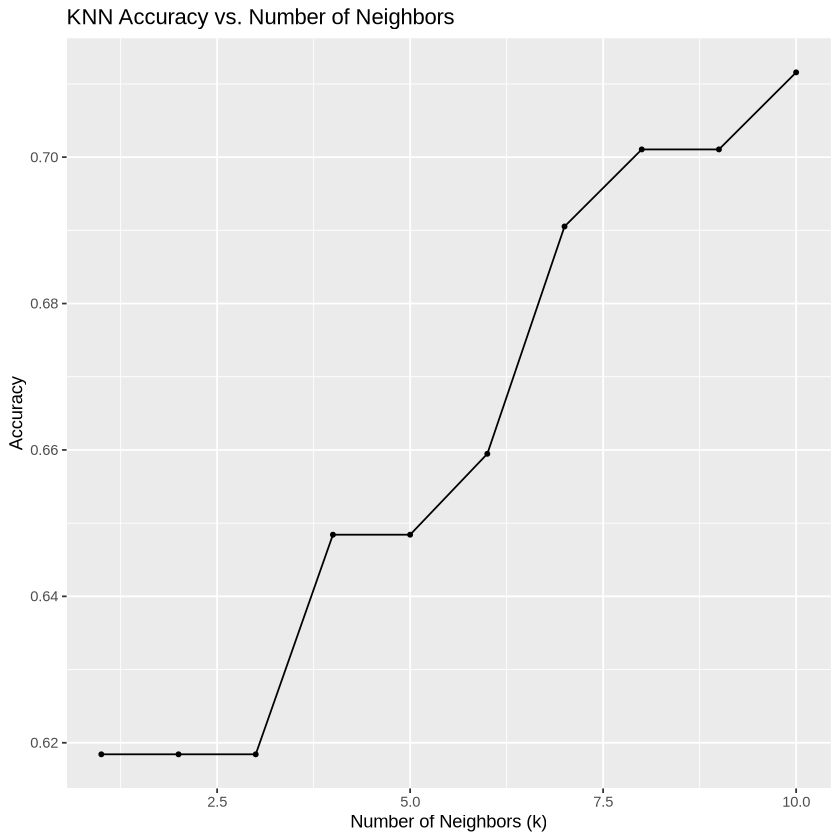

In [10]:
set.seed(4321)


df_model <- df |>
  select(subscribe, Age, experience, total_hours_played) |>
  mutate(subscribe = as.factor(subscribe))

data_split <- initial_split(df_model, strata = subscribe, prop = 0.8)
train_data <- training(data_split)
test_data <- testing(data_split)
#
df_model <- df |>
  select(subscribe, Age, experience, total_hours_played) |>
  mutate(subscribe = as.factor(subscribe))

knn_model_tuned <- nearest_neighbor(
  mode = "classification",
  neighbors = tune()) |>
  set_engine("kknn")

knn_recipe <- recipe(subscribe ~ ., data = train_data) |>
  step_normalize(all_numeric_predictors())

knn_workflow_tuned <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_model_tuned)

cv_folds <- vfold_cv(train_data, v = 5, strata = subscribe)

k_grid <- tibble(neighbors = seq(1, 10, by = 1))

tuned_results <- tune_grid(
  knn_workflow_tuned,
  resamples = cv_folds,
  grid = k_grid,
  metrics = metric_set(accuracy))

autoplot(tuned_results) +
  labs(title = "KNN Accuracy vs. Number of Neighbors", x = "Number of Neighbors (k)", y = "Accuracy")

best_k <- select_best(tuned_results, "accuracy")
print(best_k)

With k = 4 selected, the final KNN model was fitted on the training data and generated predictions for the testing data. The model achieved an accuracy of 81% on the test set. The confusion matrix showed the breakdown of true positive, true negative, false positive, and false negative classifications. While the model performed reasonably well, some misclassifications were evident, particularly in cases where the distinction between subscribers and non-subscribers was less clear-cut based on the available features.

A final visualization compared the actual subscription status to the model’s predictions. This bar plot showed areas where the model aligned well with reality and where it struggled. The model appears to be somewhat better at correctly identifying subscribers than non-subscribers.

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8076923


       Predicted
Actual  FALSE TRUE
  FALSE     3    4
  TRUE      1   18

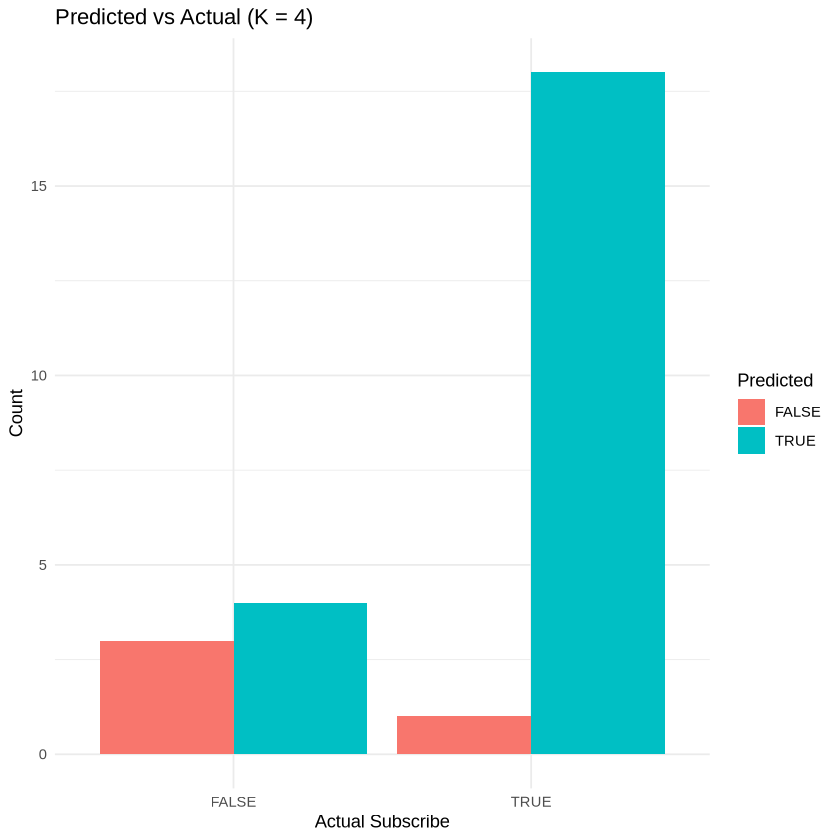

In [11]:
library(ggplot2)
set.seed(4321)
#df_model <- df |>
#  select(subscribe, Age, experience, total_hours_played) |>
#  mutate(subscribe = as.factor(subscribe))

#set.seed(4321)
#data_split <- initial_split(df_model, strata = subscribe, prop = 0.8)
#train_data <- training(data_split)
#test_data <- testing(data_split)

knn_recipe <- recipe(subscribe ~ ., data = train_data) |>
  step_normalize(all_numeric_predictors())

knn_model <- nearest_neighbor(mode = "classification", neighbors = 4) |>
  set_engine("kknn")

knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_model)

knn_fit <- knn_workflow |>
  fit(data = train_data)

knn_predictions <- predict(knn_fit, test_data) |>
  bind_cols(test_data)

accuracy(knn_predictions, truth = subscribe, estimate = .pred_class)

table(Actual = knn_predictions$subscribe, Predicted = knn_predictions$.pred_class)

knn_predictions |>
  count(subscribe, .pred_class) |>
  ggplot(aes(x = subscribe, y = n, fill = .pred_class)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Predicted vs Actual (K = 4)", x = "Actual Subscribe", y = "Count", fill = "Predicted") +
  theme_minimal()

The findings of this analysis suggest that age, gaming experience, and total hours played are moderately useful in predicting whether a player subscribes to the game’s newsletter. The KNN model with k = 4 provided a reasonable level of accuracy, demonstrating that these variables do contain some predictive signal. However, the presence of misclassifications, particularly false negatives, indicates that other unmeasured factors may play a significant role in determining subscription.

The results were partly as expected. While a good theory as to strong predictors like total hours played did contribute to the model, it was not as dominant a predictor as expected. This suggests that subscription decisions may be influenced by factors beyond gameplay time such as motivations, preferences, or responsiveness to marketing, all data not accounted for by the model.

These findings have potential for game developers and marketers. With knowledge of the characteristics associated with subscription, they can design their outreach efforts in accord. For example, players with high engagement who have not yet subscribed can be provided with targeted incentives, or messaging might be matched to player experience level.

In the future, several possible avenues for further research are apparent. One of them is to introduce additional variables into the model, e.g., in-game purchase history, achievement milestones, social interaction metrics, or survey data on player preference. Potentially exploring various modelling methods, such as logistic regression, could yield increased prediction accuracy and clarity on the relationships between the player attributes and subscription patterns.

Finally, it would be beneficial to examine the temporal dynamics of players' behaviour. Rather than employing it on its own as cumulative playtime, analysis of over-time trends—for example, changing session frequency or duration—could provide patterns associated with the subscription choice. By performing more comprehensive analysis, future research would be in a position to provide a richer understanding of what drives newsletter subscription in the context of game worlds.
